# Valeurs manquantes et factorisation de matrices

Réflexion autour des valeur manquantes et de la factorisation de matrice positive.

In [1]:
from jyquickhelper import add_notebook_menu

add_notebook_menu()

In [2]:
%matplotlib inline

## Matrice à coefficients aléatoires

On étudie la factorisation d'une matrice à coefficients tout à fait aléatoires qui suivent une loi uniforme sur l'intervalle $[0,1]$. Essayons sur une petite matrice :

In [3]:
from numpy.random import rand

M = rand(3, 3)
M

array([[ 0.05119593,  0.43722929,  0.9290821 ],
       [ 0.4588466 ,  0.14187813,  0.23762633],
       [ 0.9768084 ,  0.47674026,  0.79044526]])

In [4]:
from sklearn.decomposition import NMF

mf = NMF(1)
mf.fit_transform(M)

array([[ 0.67825803],
       [ 0.38030919],
       [ 1.02295362]])

La matrice précédente est la matrice $W$ dans le produit $WH$, la matrice qui suit est $H$.

In [5]:
mf.components_

array([[ 0.73190904,  0.50765757,  0.92611883]])

In [6]:
mf.reconstruction_err_ / (M.shape[0] * M.shape[1])

0.07236890712696428

On recalcule l'erreur :

In [7]:
d = M - mf.fit_transform(M) @ mf.components_
a = d.ravel()
e = a @ a.T
e**0.5 / (M.shape[0] * M.shape[1])

0.072368907126964283

In [8]:
e.ravel()

array([ 0.42421796])

Et maintenant sur une grande et plus nécessairement carrée :

In [9]:
M = rand(300, 10)
mf = NMF(1)
mf.fit_transform(M)
mf.reconstruction_err_ / (M.shape[0] * M.shape[1])

0.004996164872801101

L'erreur est la même :

In [10]:
errs = []
rangs = list(range(1, 11))
for k in rangs:
    mf = NMF(k)
    mf.fit_transform(M)
    e = mf.reconstruction_err_ / (M.shape[0] * M.shape[1])
    errs.append(e)

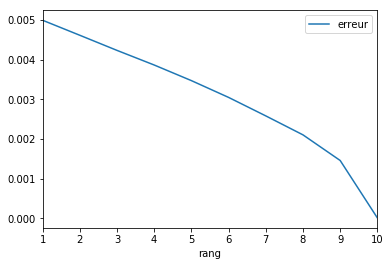

In [11]:
import pandas

df = pandas.DataFrame(dict(rang=rangs, erreur=errs))
df.plot(x="rang", y="erreur")

## Matrice avec des vecteurs colonnes corrélés

Supposons maintenant que la matrice précédente $M$ est de rang 3. Pour s'en assurer, on tire une matrice aléalatoire avec 3 vecteurs colonnes et on réplique des colonnes jusqu'à la dimension souhaitée.

In [12]:
from numpy import hstack

M = rand(300, 3)
M = hstack([M, M, M, M[:, :1]])
M.shape

(300, 10)

In [13]:
errs = []
rangs = list(range(1, 11))
for k in rangs:
    mf = NMF(k)
    mf.fit_transform(M)
    e = mf.reconstruction_err_ / (M.shape[0] * M.shape[1])
    errs.append(e)

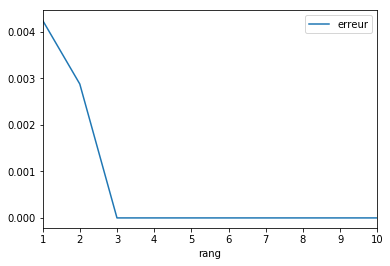

In [14]:
import pandas

df = pandas.DataFrame(dict(rang=rangs, erreur=errs))
df.plot(x="rang", y="erreur")

On essaye à nouveausur une matrice un peu plus petite.

In [15]:
M = rand(3, 2)
M = hstack([M, M[:, :1]])
M

array([[ 0.27190312,  0.6497563 ,  0.27190312],
       [ 0.44853292,  0.87097224,  0.44853292],
       [ 0.29424835,  0.65106952,  0.29424835]])

In [16]:
mf = NMF(2)
mf.fit_transform(M)

array([[ 0.61835197,  0.        ],
       [ 0.82887888,  0.29866219],
       [ 0.61960446,  0.07743224]])

In [17]:
mf.components_

array([[ 0.43972536,  1.05078419,  0.43972536],
       [ 0.28143493,  0.        ,  0.28143493]])

La dernière colonne est identique à la première.

## Matrice identité

Et maintenant si la matrice $M$ est la matrice identité, que se passe-t-il ?

In [18]:
from numpy import identity

M = identity(3)
M

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [19]:
mf = NMF(1)
mf.fit_transform(M)

array([[ 0.],
       [ 1.],
       [ 0.]])

In [20]:
mf.components_

array([[ 0.,  1.,  0.]])

In [21]:
mf.reconstruction_err_**2

2.0000000000000004

On essaye avec $k=2$.

In [22]:
mf = NMF(2)
mf.fit_transform(M)

array([[ 0.        ,  0.        ],
       [ 0.        ,  1.03940448],
       [ 0.95521772,  0.        ]])

In [23]:
mf.components_

array([[ 0.        ,  0.        ,  1.04688175],
       [ 0.        ,  0.96208937,  0.        ]])

In [24]:
mf.reconstruction_err_**2

1.0

Avec des vecteurs normés et indépendants (formant donc une base de l'espace vectoriel), l'algorithme aboutit à une matrice $W$ égale au $k$ premiers vecteurs et oublie les autres.

## Matrice identité et représentation spatiale

Pour comprendre un peu mieux ce dernier exemple, il est utile de chercher d'autres solutions dont l'erreur est équivalente.

In [25]:
def erreur_mf(M, W, H):
    d = M - W @ H
    a = d.ravel()
    e = a @ a.T
    e**0.5 / (M.shape[0] * M.shape[1])
    return e


M = identity(3)
mf = NMF(2)
W = mf.fit_transform(M)
H = mf.components_
erreur_mf(M, W, H)

1.0

In [26]:
W

array([[ 0.        ,  0.        ],
       [ 0.9703523 ,  0.        ],
       [ 0.        ,  1.02721047]])

In [27]:
H

array([[ 0.        ,  1.03055354,  0.        ],
       [ 0.        ,  0.        ,  0.97351032]])

In [28]:
W @ H

array([[ 0.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

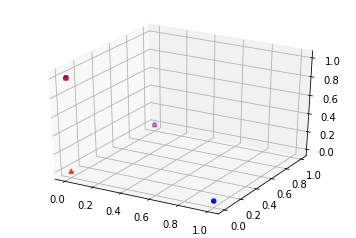

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
wh = W @ H
ax.scatter(M[:, 0], M[:, 1], M[:, 2], c="b", marker="o", s=20)
ax.scatter(wh[:, 0], wh[:, 1], wh[:, 2], c="r", marker="^")

Et si on pose maintenant :

In [30]:
import numpy

W = numpy.array([[0.5, 0.5, 0], [0, 0, 1]]).T
H = numpy.array([[1, 1, 0], [0.0, 0.0, 1.0]])
W

array([[ 0.5,  0. ],
       [ 0.5,  0. ],
       [ 0. ,  1. ]])

In [31]:
H

array([[ 1.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [32]:
W @ H

array([[ 0.5,  0.5,  0. ],
       [ 0.5,  0.5,  0. ],
       [ 0. ,  0. ,  1. ]])

In [33]:
erreur_mf(M, W, H)

1.0

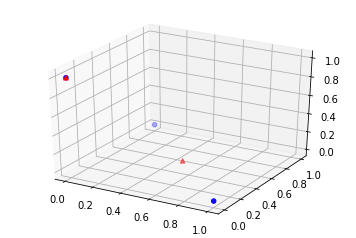

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
wh = W @ H
ax.scatter(M[:, 0], M[:, 1], M[:, 2], c="b", marker="o", s=20)
ax.scatter(wh[:, 0], wh[:, 1], wh[:, 2], c="r", marker="^")

On peut voir la matrice $M$ comme un ensemble de $n$ points dans un espace vectoriel. La matrice $W$ est un ensemble de $k < n$ points dans le même espace. La matrice $WH$, de rang $k$ est une approximation de cet ensemble dans le même espace, c'est aussi $n$ combinaisons linéaires de $k$ points de façon à former $n$ points les plus proches proches de $n$ points de la matrice $M$.